Regression gives us simply the linear relationship of two or more variables within a dataset. We have a dependent variable (or predictor variable) and has a relationship with independent variable (response variable).

In this regression task we need to predict the percentage of marks a student is expected to score based the hours studied. This is a simple linear regression with just two taks.

In [ ]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import pandas.util.testing as tm
import matplotlib.pyplot as plt


Data is found at "http://bit.ly/w-data"

In [ ]:
df = pd.read_csv('http://bit.ly/w-data')
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


From the below line a code we can say that there are no missing values in the dataset. Looking at summary statistics can give us some indication if there are any data errors.For example, there is no student who has not studied for a single hour and not scored any marks. Since we don't see any obvious errors such as “0” hours or “0” score value, let’s assume that the data is accurate.

In [ ]:
# look at missing values
df.isnull().sum().sum()
# look at summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


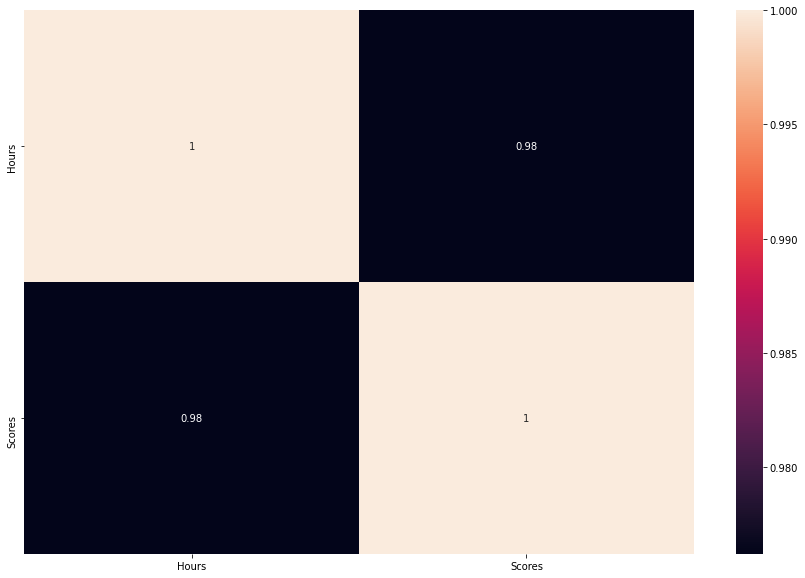

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

Depending on the problem statements defined earlier, the independent or response variable “y” is “scores”. There are some linear correlation between hours and scores. however, since we are trying to find a solution to a specific problem, we can focus on scores response variable and hours dependent variable(predictor).

Text(0.5, 1.0, 'Marks sccored distribution')

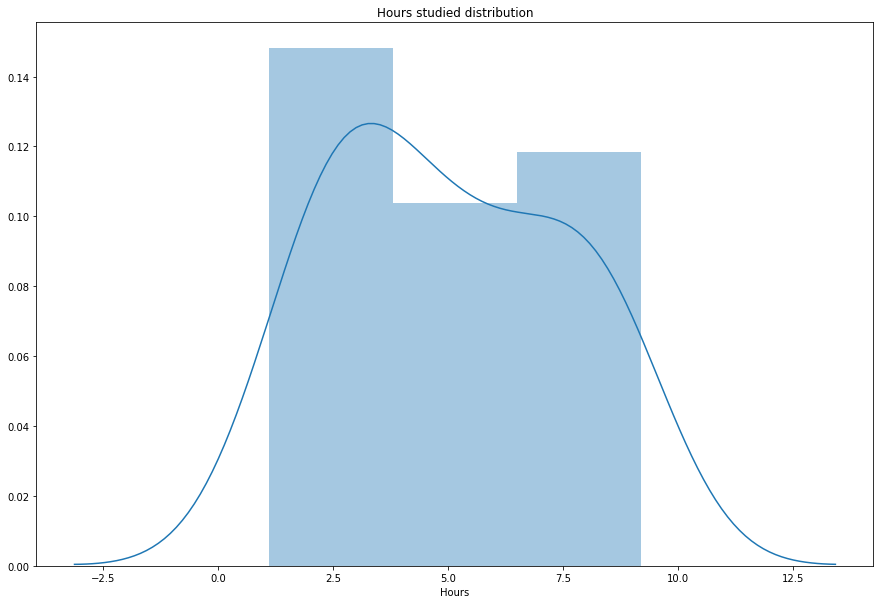

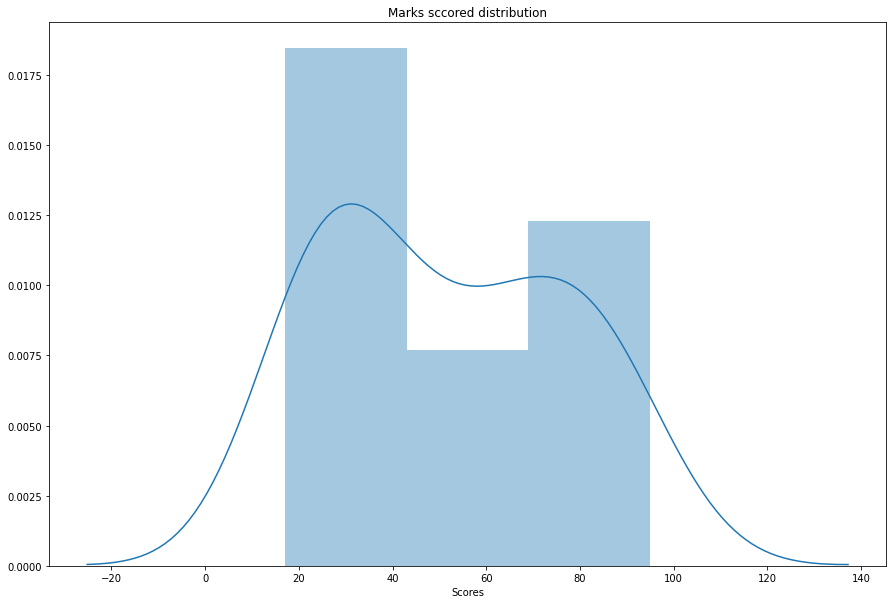

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df["Hours"])
plt.title("Hours studied distribution")
plt.figure(figsize=(15,10))
sns.distplot(df["Scores"])
plt.title("Marks sccored distribution")

In [ ]:
X = df[['Hours']]
y = df['Scores']

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(x_test)
predictions = reg.predict(x_test)
predictions

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9
9     2.7
13    3.3
1     5.1


array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

Text(0.5, 1.0, 'Linear Relationship Between Hours studied and Marks scored')

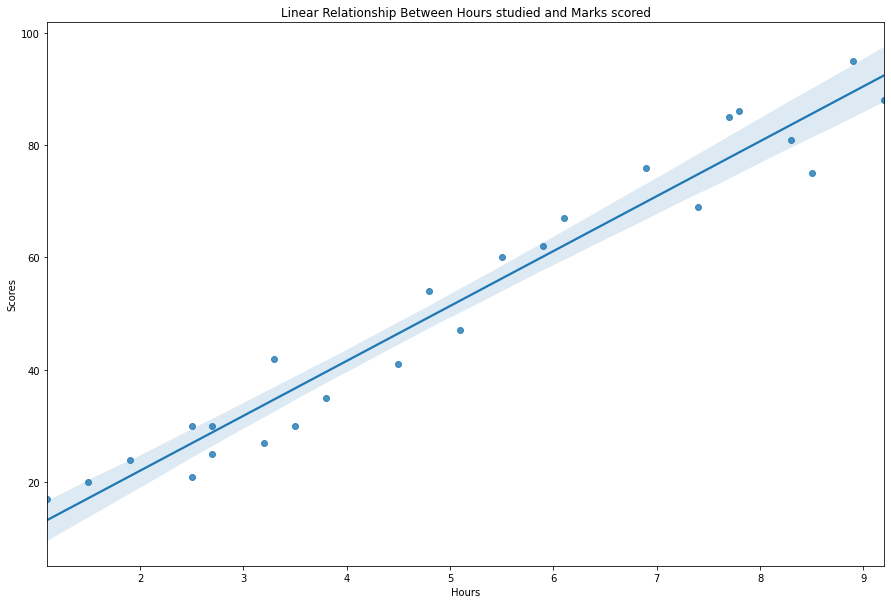

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(x="Hours", y="Scores", data=df)
plt.title("Linear Relationship Between Hours studied and Marks scored")

Before we start looking to create regression model, predictive value, errors, intercept or slope, we should look to see if the current relationship between hours as the predictor and scores as the response variable meets certain assumptions and conditions that is required for linear regression.

To create a linear regression model, we need to make sure the relationship is linear, there is independence of errors meaning, the residuals are not influencing each other and they are not following a certain pattern, there is homoscedasticity between hours and scores so that the data does not look like a funnel and normality of error distribution where the observations are mostly around the predicted value and evenly distributed.

In [ ]:
hours = float(input('Enter the total number of hours studied : '))
cls_predict = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Scores for studing total number of hours = {:.2f}%".format(cls_predict[0]))

Enter the total number of hours studied : 8
No of Hours = 8.0
Predicted Scores for studing total number of hours = 80.48%


Regardless of the statistical analysis, we need to first formulate a problem statement and understand the collection of data. We can do this by collaboration with domain experts, surveyors or business stakeholders. By following the simple steps of data summary statistics such as a summary of numerical variables, distribution, correlation, outliers, data errors and data types, we can point data errors and define analytical approach including Linear Regression. For us to be able to use linear regression accurately, we need to make sure the linear regression conditions are met. As we are looking at the data not from a researchers perspective but rather from a data analyst or data scientist vision, we do not necessarily perform every test for each condition but rather make an assumption of these conditions by looking at certain distribution plots.